In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import reuters

In [16]:
(xtrain, ytrain),(xtest, ytest) = reuters.load_data(num_words = 10000)

In [17]:
def vectorize(sequence, dimension = 10000):
    results = np.zeros(shape = (len(sequence),dimension))
    for i in range(len(sequence)):
        for j in sequence[i]:
            results[i,j] = 1.
    return results

In [18]:
xtrain = vectorize(xtrain)
xtest  = vectorize(xtest)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
ytrain = to_categorical(ytrain)
ytest  = to_categorical(ytest)

In [21]:
# create the layers
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 46, activation = 'softmax'))

In [22]:
model.compile(optimizer = 'rmsprop',
             loss = tf.keras.losses.categorical_crossentropy,
             metrics = ['accuracy'])

In [23]:
# split the data in a validation and training set
xval  = xtrain[:1000]
xtrain= xtrain[1000:]

yval  = ytrain[:1000]
ytrain= ytrain[1000:]

In [24]:
history = model.fit(xtrain, ytrain, epochs = 20, batch_size = 512, validation_data = [xval, yval])

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.5426 - accuracy: 0.5114 - val_loss: 1.6730 - val_accuracy: 0.6630
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3606 - accuracy: 0.7214 - val_loss: 1.2592 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0030 - accuracy: 0.7934 - val_loss: 1.0994 - val_accuracy: 0.7720
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7804 - accuracy: 0.8373 - val_loss: 1.0197 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6189 - accuracy: 0.8727 - val_loss: 0.9503 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4929 - accuracy: 0.8948 - val_loss: 0.9263 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3946 - accuracy: 0.9179 - val_loss: 0.9114 - val_accuracy: 0.8130
Epoch 8/20
16

In [25]:
x = np.arange(1,21)

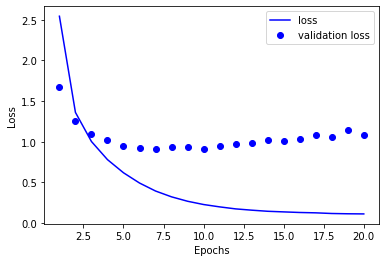

In [27]:
plt.plot(x, history.history['loss'],'b',label = 'loss')
plt.plot(x, history.history['val_loss'],'ob',label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

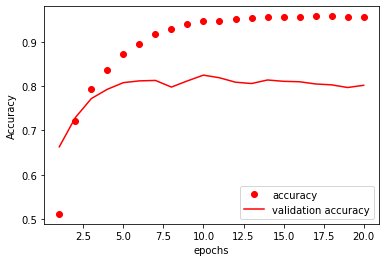

In [30]:
plt.plot(x, history.history['accuracy'],'or',label='accuracy')
plt.plot(x, history.history['val_accuracy'],'r',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
predictions = model.predict(xtest)

In [33]:
sum(predictions[0])

0.9999999570879157

In [34]:
predictions[0].shape

(46,)

In [46]:
np.argmax(predictions[142])

4

In [47]:
np.argmax(ytest[142])

4

In [60]:
a = np.arange(10)

In [62]:
b = np.array(a)

In [63]:
b[0] = 1000

In [64]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
b

array([1000,    1,    2,    3,    4,    5,    6,    7,    8,    9])

In [66]:
c = np.asarray(a)

In [67]:
c[0] = 1000

In [68]:
c

array([1000,    1,    2,    3,    4,    5,    6,    7,    8,    9])

In [69]:
a

array([1000,    1,    2,    3,    4,    5,    6,    7,    8,    9])